# Piorozación de hipótesis y Test A/B para tienda en línea

## 1. Introducción 
En este proceso se realizará un análisis para una tienda en línea. Los datos de este proyecto provienen del departamento de marketing siendo una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Se hará el proceso para priorizar estas hipótesis, y poder lanzar un test A/B para analizar los resultados.

Los datasets contienen los siguientes datos: 

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una, con la siguiente descripción de las columnas:

- Hypotheses: breves descripciones de las hipótesis
- Reach: alcance del usuario, en una escala del uno a diez
- Impact: impacto en los usuarios, en una escala del uno al diez
- Confidence: confianza en la hipótesis, en una escala del uno al diez
- Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

Para lograr realizar los test A/B se deberá utilizar datasets que contienen las ordenes realizadas y las visitas del sitio. 
Estos datasets contienen las siguientes columnas: 

orders_us.csv: 

- transactionId: identificador de pedido
- visitorId: identificador del usuario que realizó el pedido
- date: fecha del pedido
- revenue: ingresos del pedido
- group: el grupo del test A/B al que pertenece el usuario.

visits_us.csv: 

- date: la fecha
- group: grupo del test A/B
- visits: el número de visitas en la fecha especificada para el grupo de test A/B especificado

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt
import seaborn as sns

In [2]:
#Leer datasets
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
visits = pd.read_csv('/datasets/visits_us.csv', sep=',')

## 2. Exploración inicial y limpieza de datos

In [3]:
#Información para optimizar datasets
hypotheses.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [4]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [5]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [6]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [7]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
#Renombramos columnas para facilitar análisis 
hypotheses.columns = hypotheses.columns.str.lower()

orders = orders.rename(columns={'transactionId' : 'transaction_id',
                                'visitorId' : 'visitor_id',
                                         })



In [10]:
#Revisamos cambios
hypotheses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB


In [11]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


In [12]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1197 non-null   int64  
 1   visitor_id      1197 non-null   int64  
 2   date            1197 non-null   object 
 3   revenue         1197 non-null   float64
 4   group           1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB


In [13]:
#Aparantemente no hay valores nulos, se comprueba 
print(visits.isna().sum())
print('---------------------')
print(orders.isna().sum())

date      0
group     0
visits    0
dtype: int64
---------------------
transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


In [14]:
print(visits.duplicated().sum())
print('---------------------')
print(orders.duplicated().sum())

0
---------------------
0


In [15]:
#Revisamos que no haya usuarios en dos grupos 
#creamos otrs df para conocer en cuantos grupos se halla cada usuario
df = orders.groupby('visitor_id')['group'].nunique().reset_index()
df.columns = ['visitor_id', 'groups']
df.head()

,visitor_id,groups
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [16]:
#Filtramos para ver cuantos usuarios con dos grupos hay 
print(df.query('groups == 2').count())

visitor_id    58
groups        58
dtype: int64


In [17]:
#unimos con df principal de orders 
orders = orders.merge(df, on='visitor_id')
orders.head()

,transaction_id,visitor_id,date,revenue,group,groups
0,3667963787,3312258926,2019-08-15,30.4,B,1
1,2804400009,3642806036,2019-08-15,15.2,B,1
2,2961555356,4069496402,2019-08-15,10.2,A,2
3,1473132782,4069496402,2019-08-12,10.8,B,2
4,3797467345,1196621759,2019-08-15,155.1,B,1


In [18]:
#Eliminamos columnas con usuarios en dos grupos 
orders = orders[orders['groups'] != 2].reset_index(drop=True)

In [19]:
#Verficamos cambios 
orders['groups'].unique()

array([1], dtype=int64)

In [20]:
#Elimanamso columna con numero de grupos 
orders = orders.drop ('groups', axis = 1)

In [21]:
orders.sample(20)

,transaction_id,visitor_id,date,revenue,group
310,1407575382,1097629811,2019-08-24,45.4,B
50,2145193898,1221478247,2019-08-16,25.2,B
627,390467479,2546716293,2019-08-05,30.8,A
972,453686528,2134820861,2019-08-13,295.7,A
703,1605437540,3012531415,2019-08-21,100.0,A
322,1552043751,109615108,2019-08-06,35.7,A
930,4279408906,1002877908,2019-08-12,15.8,A
472,384670583,1247895435,2019-08-04,10.0,A
53,4049927765,343208965,2019-08-16,25.8,A
385,2291372207,2968526225,2019-08-28,35.8,B


### Hallazgos sobre exploración inicial y limpieza de datos 

Se cambiaron lso tipos de columnas a aquellas que serían más adecuadas para el análsis, no se hallaron valores nulos o duplciados, sin embargo se busca elimianr usuiaruios que se hallen eme grupos A y B al mismo tiempo

## 3. Priorización de hipótesis

Calculamos framework ICE & RICE para priorizar hipótesis. 

In [22]:
hypotheses.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [23]:
#Calculamos ICE 
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']


In [24]:
#Mostramos resultado en orden descendente de prioridad.
print(hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


In [25]:
#Calculamos RICE 
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [26]:
#Mostramos resultado en orden descendente de prioridad.
print(hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


In [27]:
case1= hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
case2 =hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

print(case1)
print('--------------------------------------------------------------------------------------------------------------------------------------------')
print(case2)

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000
--------------------------------------------------------------------------------------------------------------------------------------------
                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting 

### Hallazgos sobre priorización de hipótesis

- ICE: Hipótesis número 8 - Launch a promotion that gives users discounts on their birthdays. Esta hipotesis obtuvo un puntaje de 16.2.
- RICE:  Hipótesis número 7 - Add a subscription form to all the main pages. This will help you compile a mailing list . Esta hipotesis obtuvo un puntaje de 112.


## 4. Análisis de test A/B

In [28]:
print(orders.head())
print('--------------------------------------------------------------------------------------------------------------------------------------------')
print(visits.head())

   transaction_id  visitor_id        date  revenue group
0      3667963787  3312258926  2019-08-15     30.4     B
1      2804400009  3642806036  2019-08-15     15.2     B
2      3797467345  1196621759  2019-08-15    155.1     B
3      2282983706  2322279887  2019-08-15     40.5     B
4       182168103   935554773  2019-08-15     35.0     B
--------------------------------------------------------------------------------------------------------------------------------------------
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756


In [29]:
#Representa gráficamente el ingreso acumulado por grupo.
#Apicamos función lambda para mapear fechas 
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [30]:
#Eliminamos posibles duplicados 
datesGroups = orders[['date', 'group']].drop_duplicates()

In [31]:
#Declaramos la variable ordersAggregated para almacenar datos de orders 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [32]:
#Declaramos la variable ordersAggregated para almacenar datos de visits
visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visits': 'sum'
            }
            ),
    axis=1,
).sort_values(by=['date', 'group'])

In [33]:
#Creamos cumulative data para obetner valores acumualdos 
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [34]:
#Nombramos columnas e imprimimos df 
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


In [35]:
#Separamos datos de grupo A y B 
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

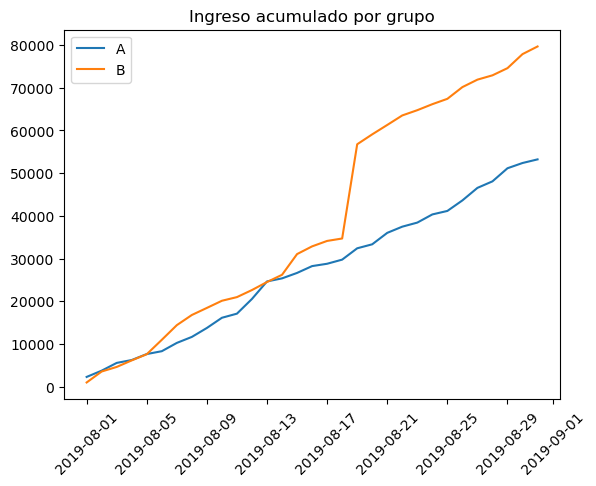

In [36]:
#Cosntruimos grafica para ingresos acumulados por grupo 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.title("Ingreso acumulado por grupo")
plt.xticks(rotation=45)
plt.show()


Los ingresos acumualdos del grupo B a partir del 17 de agosto parecen mucho mayores que los del grupo A, esto podría indicar un mejor rendimiento en la prueba del grupo B 

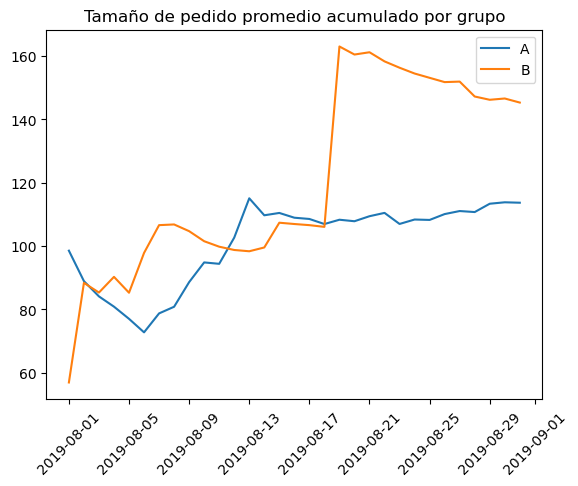

In [37]:
#Representa gráficamente el tamaño de pedido promedio acumulado por grupo.
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], 
         label='A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], 
         label='B')

plt.title('Tamaño de pedido promedio acumulado por grupo')
plt.xticks(rotation=45)
plt.legend()
plt.show()

El grupo B tiene mucha ventaja sobre el grupo A, sin embargo este caso es un aumento mucho más marcado lo que en los promedios podría indicar presencia de valores atípicos dentro del grupo B

In [38]:
#Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. 

In [39]:
#Unimos ambso ingresos acumulados 
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)

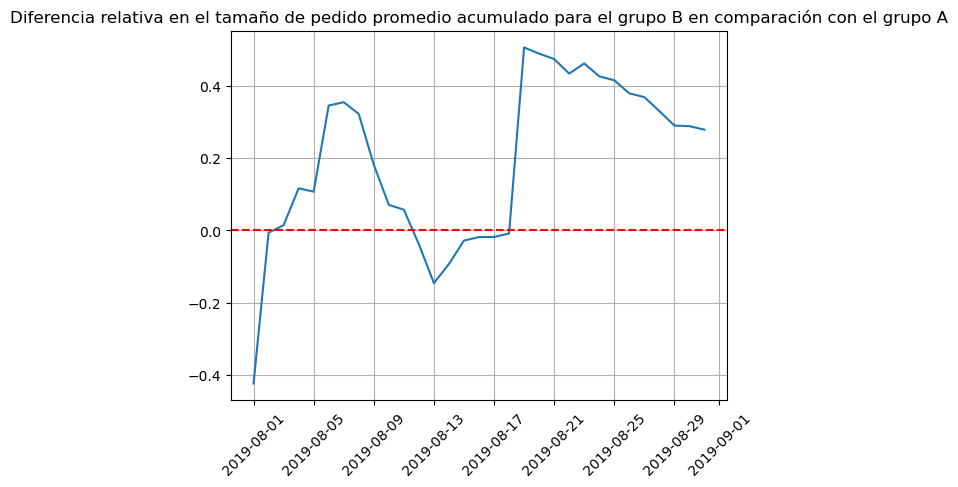

In [40]:
#Mostramso diferencai relativa 
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    / (
        mergedCumulativeRevenue['revenueA']
        / mergedCumulativeRevenue['ordersA']
    )
    - 1,
)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A')
plt.xticks(rotation=45)
plt.grid(visible=True, which='major', axis='both')
plt.show()

Observamos el mismo patrón donde hay picos de consumo atípicos sobre todo entre el 17 y 21 de agosto donde se dispara el pedido promedio, confirmando de cierta manera la presencia de valores atipicos. 

In [41]:
#Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. 

In [42]:
#Agregamos clumna para tasa de conversion 
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)


In [43]:
#Se almacenan s los datos de los pedidos en los segmentos A y B
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

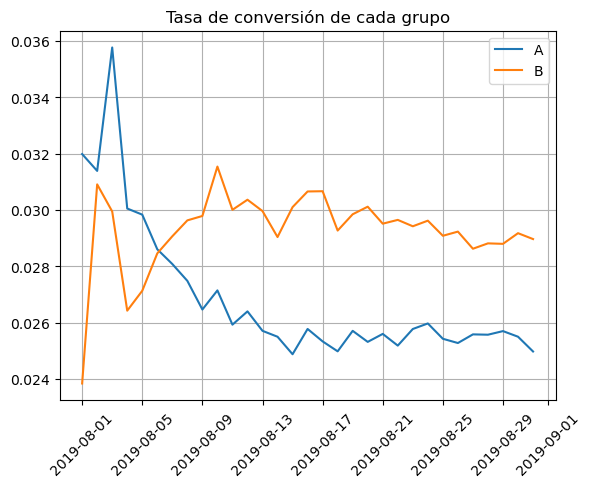

In [44]:
#Mostramos tasa de convresion por grupo 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Tasa de conversión de cada grupo')
plt.xticks(rotation=45)
plt.grid(visible=True, which='major', axis='both')
plt.show()

Observamos que la tasa de conversion baja significativamente el el grupo A, mientras que hay tendencia al alza para grupo B, sin embargo parece que tienden a estabilizarse.

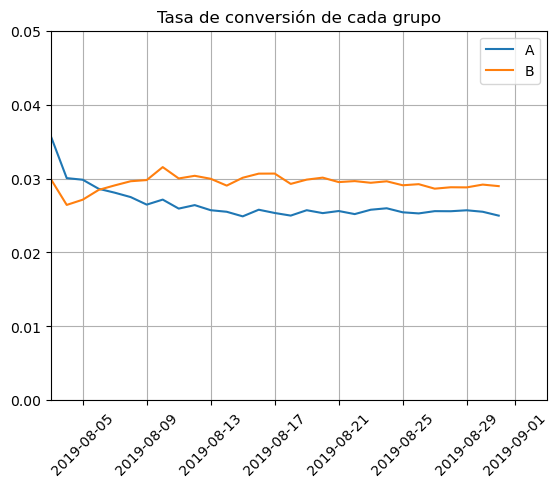

In [45]:
#Cambiamos el eje para observar mejor la tendencai de estabilización 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Tasa de conversión de cada grupo')
plt.xticks(rotation=45)
plt.axis([pd.to_datetime('2019-08-03'), pd.to_datetime('2019-09-03'), 0, 0.05])
plt.grid(visible=True, which='major', axis='both')
plt.show()

Observamos que el grupo A comenzó al alza, sin embargo después se estabiliza la muestra, en el caso del grupo B ocurre lo contrario, comienza abajo, para después tener un repunte que lo coloca por encima del grupo A para después lograr estabilizarse. 


In [46]:
#Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia

In [47]:
#unimos ambas conversiones para poder compararlas 
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)


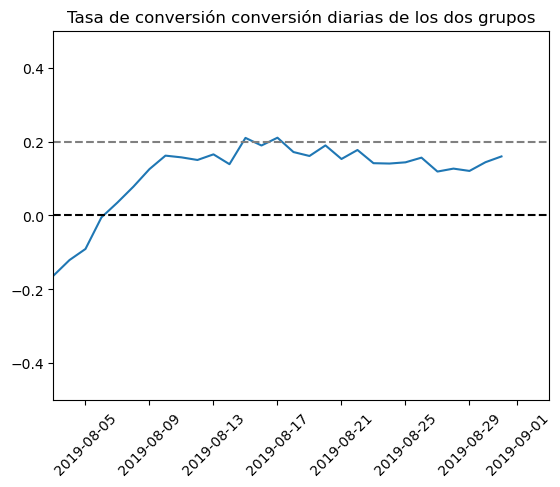

In [48]:
#Trazamos gráfica
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']
    / mergedCumulativeConversions['conversionA']
    - 1,
)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('Tasa de conversión conversión diarias de los dos grupos')
plt.xticks(rotation=45)
plt.axis([pd.to_datetime('2019-08-03'), pd.to_datetime('2019-09-03'), -0.5, 0.5])
plt.show()
 

Al parecer el grupo B tiene mejores resultados que el grupo A el cual bajó su rendimeinto al estabilizarse la prueba, sin embargo aún no podemos verificar que el grupo B sea mejor que el grupo A por temas de valores atípicos.

In [49]:
#Traza un gráfico de dispersión del número de pedidos por usuario. 


In [50]:
#Creamos un nuevo df para agrupar las ordenes  
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})    
)
ordersByUsers.columns = ['visitor_id', 'orders']

ordersByUsers.head()

,visitor_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


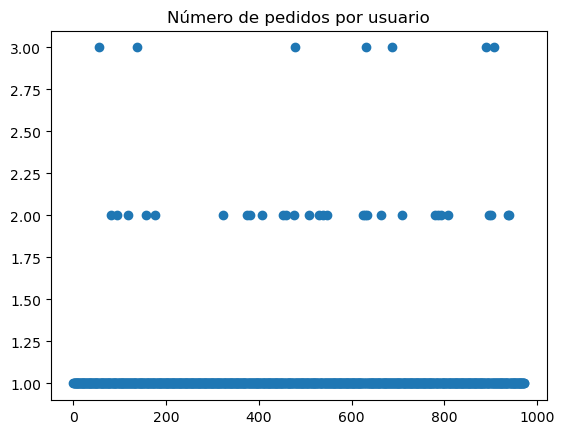

In [51]:
#Graficamos las ordenes por usuario 
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x= x_values,
             y= ordersByUsers['orders'], 
             )
plt.title('Número de pedidos por usuario')
plt.show()

La mayoría de usuarios solo realiza una orden, una cantidad considerable de usuarios podemos observar que hacen 2 pedidos. 
Fianalmente vemos que hay muy pocos usurios que hacen 3 pedidos, siendo que podemos considerarlos como valores atípicos. 

In [52]:
#Calcula los percentiles 95 y 99 para el número de pedidos por usuario.
pedidos_95 = np.percentile(ordersByUsers['orders'], [95])
pedidos_99 = np.percentile(ordersByUsers['orders'], [99])
print("Percentil 95 para el número de pedidos por usuario: ", pedidos_95.astype(int))
print("Percentil 99 para el número de pedidos por usuario: ", pedidos_99.astype(int))

Percentil 95 para el número de pedidos por usuario:  [1]
Percentil 99 para el número de pedidos por usuario:  [2]


Observamos en lo percentiles que aquellos usuarios que realizan más de dos pedidos no son más del 1% por lo que se podrían considerar valores atípicos 

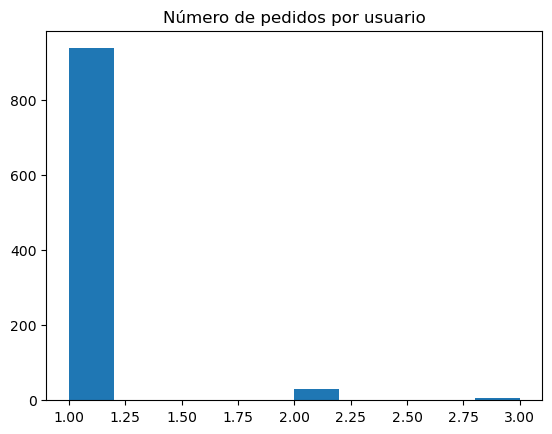

In [53]:
#Define el punto en el cual un punto de datos se convierte en una anomalía.
#Trazamos un histograma para verificar la infromación 
plt.hist(ordersByUsers['orders'])
plt.title('Número de pedidos por usuario')
plt.show()

Como podemos observar incluso las ordenes con dos pedidos, podrían considerarse anomalias considerando la cantidad de usuarios que realizan un solo pedido,por lo que podemso considerar que a partir de dos pedidos es un valor anómalo

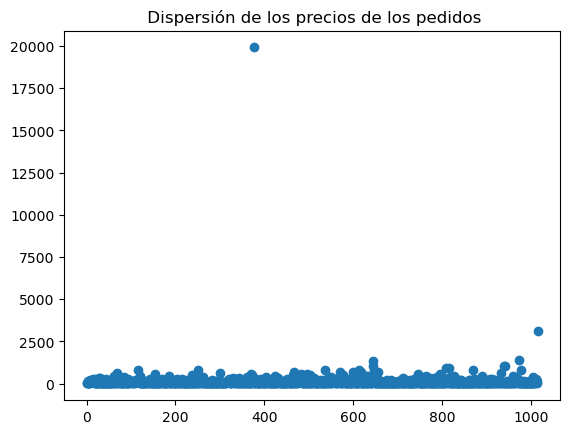

In [54]:
#Traza un gráfico de dispersión de los precios de los pedidos.
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x= x_values,
            y= orders['revenue']
    
)
plt.title(' Dispersión de los precios de los pedidos')
plt.show()

Podemos observar que la mayoría de pedidos están por debajo de los 2500, siendo que es una minoría los que superan dicho rango, por lo que es prudente considerarlos valores atipicos

In [55]:
#Calcula los percentiles 95 y 99 de los precios de los pedidos. 
precio_95 = np.percentile(orders['revenue'], [95])
precio_99 = np.percentile(orders['revenue'], [99])
print("Percentil 95 para los precios de los pedidos: ", precio_95.astype(float))
print("Percentil 99 para los precios de los pedidos: ", precio_99.astype(float))

Percentil 95 para los precios de los pedidos:  [414.275]
Percentil 99 para los precios de los pedidos:  [830.3]


Observamos que solo el 5% de los precios supera los 415, siendo que solo el 1% de los usauri generó ingresos del doble, de 800, siendo que incluso los valores atípicos vistos en el scatter, estan inclusive muy lejos de este 1%

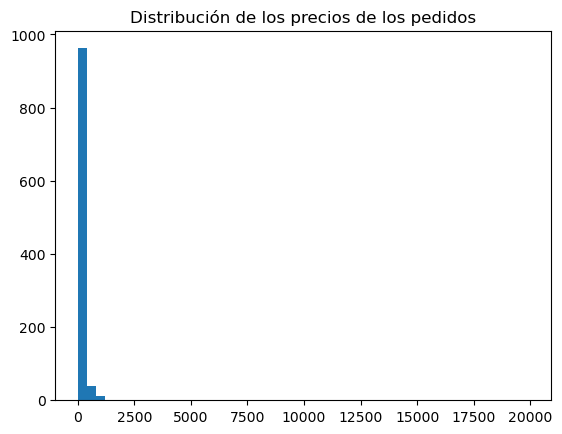

In [56]:
#Define el punto en el cual un punto de datos se convierte en una anomalía.
#Trazamos un histograma para verificar la infromación 
plt.hist(orders['revenue'], 
         bins= 50)
plt.title('Distribución de los precios de los pedidos')
plt.show()

Observamos que la gran mayoría de usuarios hace pedido menores, sin embargo para determinar un mejor limite trazaremos el limite a el percentil de 95 

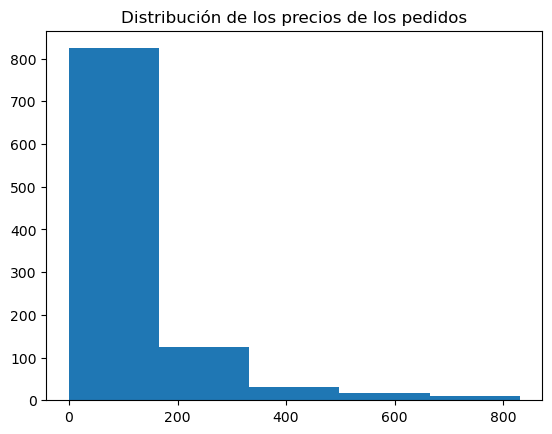

In [57]:
plt.hist(orders['revenue'], 
         range=(0, 830.3),
         bins = 5)
plt.title('Distribución de los precios de los pedidos')
plt.show()

La gran mayoría de los pedidos son menores incluso a 100, por lo que incluso el percentil 99 de 800 puede ser considerado como una anomalía, siendo que como vemos en el histograma es una muestra poco significativa siendo que después de 400 se reduce bastante el número de pedidos que superan esta cifra

In [58]:
#Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. 

In [59]:
#se crean las variables ordersByUsersA y ordersByUsersB para almacenar las columnas 'user_id' y 'orders'
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders']

#se crea SampleaA y SampleB para almecenar los usaurios que tengan al menos un pedido
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#Se calcula la significancia estadística de la diferencia en la conversión aplicando la prueba de Mann-Whitney.
print('{0:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1])) #Imprimimos el valor p para comparar la conversión redondeado a cinco decimales.
#Se calcula la diferencia relativa en la conversión y se redondea el resultado a tres decimales.
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.01102
0.160


Tomando un valor p de 0.05, observamos que el valor p de esta prueba es menor por lo que rechazamos la hipótesis nula. 
Por ende podemso decir que con base en los datos sin procesar, las tasas de conversión de los grupos tienen diferencias estadísticamente significativas. 
La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 16%.

In [60]:
#Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. 
##Se calcula la significancia estadística de la diferencia en la conversión aplicando la prueba de Mann-Whitney.
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[orders['group'] == 'A']['revenue'],
            orders[orders['group'] == 'B']['revenue'],
        )[1]
    )
)
#Se calcula la diferencia relativa en la conversión y se redondea el resultado a tres decimales.
print(
    '{0:.3f}'.format(
        orders[orders['group'] == 'B']['revenue'].mean()
        / orders[orders['group'] == 'A']['revenue'].mean()
        - 1
    )
)

0.862
0.278


El valor p es superior a 0.05 por lo que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos. Sin embargo la diferencia relativa es considerable al ser de 27.8%, esto puede deberse a los valores atípicos que excedían por mucho la media de los pedidos, por ende es recomendable filtrar los datos anómalos

In [61]:
#Filtramos número de órdenes mayores a 1 recordando lo resultados de los percentiles 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)

In [62]:
#Filtramos número de órdenes mayores a 400 recordando los resultados de los percentiles 
usersWithExpensiveOrders = orders[orders['revenue'] > 400]['visitor_id']

In [63]:
#Creamos un nuevo df con usuariso anómalos
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(10)

500    113298937
939    148427295
404    154576532
798    204675465
33     249864742
599    358944393
570    382846391
58     611059232
652    689129267
612    759473111
dtype: int64

In [64]:
#Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados.

In [65]:
#Creamos variable para filtrar datos del grupo A
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers)) #Filtramos usuarios con anomalias 
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [66]:
#Repetimos el proceso para el grupo B 
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [67]:
#Calculamos sigficancia estdistica como anteriormente se hizo, pero esta vez sin datos anormales 
print(
    "{0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
)
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.01590
0.176


Obtenemos un resultado similar al de los datos no filtrados. 
Tomando un valor p de 0.05, observamos que el valor p de esta prueba es menor por lo que rechazamos la hipótesis nula. 
Por ende podemso decir que con base en los datos sin procesar, las tasas de conversión de los grupos tienen diferencias estadísticamente significativas. 
La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 17.6%.

In [68]:
#Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. 


In [69]:
#Calculamos p para comparar los tamaños de pedido promedio de los grupos filtrados, redondeado a 3 decimales 
print(
    "{0:.3f}".format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),#Filtramos usuarios con anomalias 
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),#Filtramos usuarios con anomalias 
                )
            ]['revenue'],
        )[1]
    )
)
#Calculamos la ganancia relativa del grupo B redondeada a tres decimales
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.575
-0.070


Observamos que el valor p aumentó no permitiendo recahzar la hipotesis nula. 
Por ende, esta vez no obtuvimos una diferencia estadísticamente significativa entre los tamaños de pedido promedio de los grupos. 
Además para este caso la diferencia es el 7% 


## 5. Conclusiones

Primero aplicamso pruebas RICE y ICE para pririzar hipotesis donde obtuvimos que las hipotesis con mejores resultados fueron las siguientes:
- ICE: Hipótesis número 8 - Launch a promotion that gives users discounts on their birthdays (Lanzar una promoción que ofrezca a los usuarios descuentos en su cumpleaños.). Esta hipotesis obtuvo un puntaje de 16.2.
- RICE:  Hipótesis número 7 - Add a subscription form to all the main pages. This will help you compile a mailing list (Agregar un formulario de suscripción a todas las páginas principales. Esto le ayudará a compilar una lista de correo.). Esta hipotesis obtuvo un puntaje de 112.

Una vez realizado la priorización de hipótesis pasamos a obtener resultados de la prueba A/B: 

En este caso, observamos que el grupo A y B parecían tener redimientos similares, sindo que aparenemente el grupo B obtenía al principio resultados más óptimos, sin embargo al eliminar  valores atípicos observamos que esta tendencia fue disminiuda. 

Para el caso de los ingresos una vez eliminados valores atípicos,  el grupo A y b no mostraron diferencias signiifcativas pero, no fue asi para el caso de la conversion, donde si que se obtuvo una diferncia. 
Podríamos conlcuir entonces lo siguiente: 

- Hay una diferencia estadísticamente significativa en la conversión entre los grupos, según los datos sin procesar y filtrados.

- Los datos sin procesar mostraron una diferencia estadísticamente significativa entre los grupos en cuanto a tamaño promedio de compra. Sin embargo, después de eliminar las anomalías, resultó que no había una diferencia estadísticamente significativa.

- El gráfico de la diferencia de conversión entre los grupos muestra que los resultados del grupo B son mejores que los del grupo A: tienen tendencia a crecer o se estabilizaron alrededor de la media.

Por ende podriamos conluir que al prueba puede ser terminada, demostrando que si bien la hipotesis  de esta caso no mostró aumento sognificativo en los ingresos si lo realizó en las tasas de conversión 